In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']
from PIL import Image

# Implementation

import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display

In [36]:
#cd D:\Formation_IA\P3
#python -m voila .\prototype.ipynb

In [37]:
df = pd.read_csv('openfood_filtered.csv', delimiter=',')
df = df.drop(['Unnamed: 0'], axis=1)

In [38]:
ALL = 'ALL'
nutriscore = ALL
pnns = ALL

def common_filtering(nutriscore, pnns):

    if (nutriscore == ALL) & (pnns == ALL):
        common_filter = df
    elif nutriscore == ALL:
        common_filter = df[df['pnns_groups_1'] == pnns]
    elif pnns == ALL:
        common_filter = df[df['nutrition_grade_fr'] == nutriscore]
    else:
        common_filter = df[
            (df['pnns_groups_1'] == pnns) & (df['nutrition_grade_fr'] == nutriscore)
        ]
    print("Data set size", common_filter.shape)
    return common_filter.head(20)

# Open Food Facts

Open Food Facts est une base de données de produits alimentaires qui permet de faire des choix plus informés. Sur cette page vous trouverez une version simplifiée et nettoyée de la base de données disponible sur le site https://fr.openfoodfacts.org/ ainsi que des visualisations qui permettent de comprendre et d'analyser les produits alimentaires.  

L'objet de ce prototype est d'analyser en profondeur les produits plus sains et proposer une solution de choix de produit.  

Le système de filtrage du jeu de données ci-bas peut être utilisé pour aider à choisir un aliment plus sain parmi les produits dans la base de données. En choissisant le nutrigrade et la catégorie souhaitée, une liste de 10 aliments avec des nutrition scores les plus bas (les aliments les plus sains) apparaissent. 

***

## Choix d'un produit sain

In [39]:
df_p = df.drop(['categories', 'saturated-fat_100g'], axis=1)

In [40]:
def show_filtered_dataframe(Categorie, Nutrigrade, Trier):
    df_filtered = df_p[(df_p['pnns_groups_1']==Categorie)&(df_p['nutrition_grade_fr']==Nutrigrade)]
    df_filtered = df_filtered.sort_values(by=[Trier]).reset_index(drop=True)
    return df_filtered
    
pnns_unique = df_p['pnns_groups_1'].unique()
nutrigrade_unique = ['A', 'B', 'C', 'D', 'E']
sort_column = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

choice = interactive(show_filtered_dataframe, Categorie = pnns_unique, Nutrigrade = nutrigrade_unique, Trier = sort_column)

button = widgets.Button(description="Résultats")
button_graph = widgets.Button(description="Afficher histogramme")
output = widgets.Output()

def on_button_clicked(b):
    output.clear_output()
    
    with output:
        final = choice.result
        size = final.shape[0]
        print("Il y a ", size, "resultats")
        display(final)

button.on_click(on_button_clicked)
print("Veuillez choisir une valeur Nutrigrade et une catégorie d'aliment : ")
display(choice, button, output)

Veuillez choisir une valeur Nutrigrade et une catégorie d'aliment : 


interactive(children=(Dropdown(description='Categorie', options=('fruits and vegetables', 'sugary snacks', 'ce…

Button(description='Résultats', style=ButtonStyle())

Output()

In [41]:
score_a = df[df['nutrition_grade_fr']=='A']
score_b = df[df['nutrition_grade_fr']=='B']
score_c = df[df['nutrition_grade_fr']=='C']
score_d = df[df['nutrition_grade_fr']=='D']
score_e = df[df['nutrition_grade_fr']=='E']

***

## Répartition d'aliments par nutrition grade

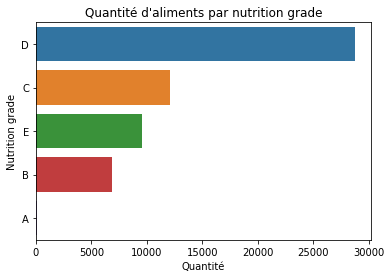

In [42]:
# Aliments par nutrition grade

foods_count = df['nutrition_grade_fr'].value_counts().index
sns.countplot(y="nutrition_grade_fr", order=foods_count, data=df);
plt.title("Quantité d'aliments par nutrition grade")
plt.xlabel("Quantité")
plt.ylabel("Nutrition grade")
plt.show()

In [43]:
fig = px.histogram(df, x="pnns_groups_1", color="nutrition_grade_fr", 
        title = 'Répartition des aliments en fonction de leur nutrition grade et catégorie')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
        xaxis_title = "Catégorie PNNS1",
        yaxis_title = "Quantité",
        legend_title = "Nutrition Grade"
)
fig.show()

In [44]:
import plotly.express as px
fig = px.histogram(df, x="pnns_groups_2", color="nutrition_grade_fr", 
        title = 'Répartition des aliments en fonction de leur nutrition grade et catégorie')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
        xaxis_title = "Catégorie PNNS2",
        yaxis_title = "Quantité",
        legend_title = "Nutrition Grade"
)
fig.show()

Le graphique ci-haut est reparti en sous-catégories par rapport au premier graphique et permet une analyse plus approfondi. Il existe dans le jeu de données beaucoup de produits avec un nutri-grade de 'D' ou 'E' qui se trouvent dans les sous-catégories sucrées comme les chocolats, les biscuits et les boissons sucrées.  

Très peu d'informations sont visibles sur le nutrition grade A, mais une analyse approfondie est disponible plus bas.

***
# NUTRI-GRADE A

Nous pouvons constater que les produits d'un nutri-grade de 'A' sont tellement rares qu'ils n'apparaissent pas dans les graphiques ci-haut (en haut de la barre 'beverages' nous pouvons voir quelques produits).

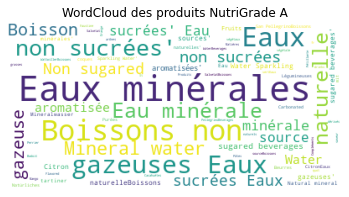

In [45]:
text = score_a['product_name'].values + score_a['categories'].values
wordcloud = WordCloud(background_color='white', stopwords=exclure_mots).generate(str(text))
plt.imshow(wordcloud)
plt.title("WordCloud des produits NutriGrade A")
plt.axis("off")
plt.show();

Il est clair que les produits d'un nutrigrade A sont principalement des boissons non sucrées, comme les eaux minérales ou aromatisées.

In [46]:
fig = px.pie(score_a, values=score_a.value_counts().values, names='pnns_groups_2')
fig.update_traces(hoverinfo='label+percent')
fig.update_layout(title_text='Catégories de produits avec un nutri-grade de A', title_x=0.5, legend_title = "Catégorie d'aliment")
fig.show()

Nous confirmons cela avec notre pie chart : les produits avec un nutrigrade de "A" sont surtout (90%) des boissons non-sucrées et 7% des boissons sucrées.

***
# NUTRI-GRADE B

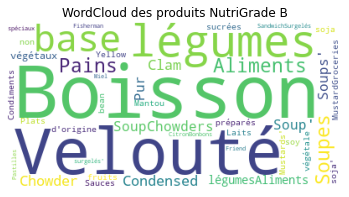

In [47]:
text = score_b['product_name'].values + score_b['categories'].values
wordcloud = WordCloud(background_color='white', stopwords=exclure_mots).generate(str(text))
plt.imshow(wordcloud)
plt.title("WordCloud des produits NutriGrade B")
plt.axis("off")
plt.show();

Grâce à ce WordCloud, nous avons un premier aperçu des aliments qui ont reçu un nutrigrade de B : des boissons, des soupes, des plains, des légumes, des fruits, des quiches, et des plants préparés.

In [48]:
fig = px.histogram(score_b, x="pnns_groups_2", 
        title = 'Répartition des aliments de nutri-grade B')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
        xaxis_title = "Catégorie PNNS2",
        yaxis_title = "Quantité"
)
fig.show()

Les catégories de nutri-grade B sont principalement des plats préparés, des produits laitiers, des céréales, des produits de la mer et du pain, entre autres.

Dans l'histogramme en haut de la page, les produits de nutri-grade 'B' sont présents en grande quantité dans la colonne 'composite foods' et 'milk and dairy products', rares dans les colonnes 'sugary snacks' et 'salty snacks'.  

***
# NUTRI-GRADE C

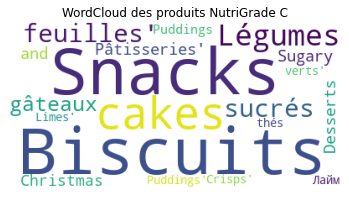

In [49]:
text = score_c['categories'].values
wordcloud = WordCloud(background_color='white', stopwords=exclure_mots).generate(str(text))
plt.imshow(wordcloud)
plt.title("WordCloud des produits NutriGrade C")
plt.axis("off")
plt.show();

Nous pouvons constater déjà des produits sucrés, des desserts, des gâteaux et des puddings.

In [50]:
fig = px.histogram(score_c, x="pnns_groups_2", 
        title = 'Répartition des aliments de nutri-grade C')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
        xaxis_title = "Catégorie PNNS2",
        yaxis_title = "Quantité"
)
fig.show()

Beaucoup de légumes et de fruits ont un nutri-grade de C, une hypothèse est que cela est dû à la présence des glucides dans les légumes (ex. les pommes de terre) et les fruits (ex. raisins).  

Les autres catégories n'étonnent pas : les produits laitiers, la viande, les desserts, etc.

***
# NUTRI-GRADE D

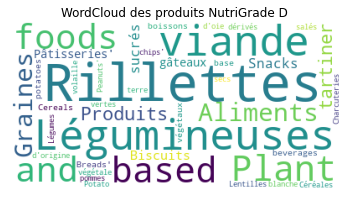

In [51]:
text = score_d['categories'].values
wordcloud = WordCloud(background_color='white', stopwords=exclure_mots).generate(str(text))
plt.imshow(wordcloud)
plt.title("WordCloud des produits NutriGrade D")
plt.axis("off")
plt.show();

Dans la catégorie nutri-grade D, nous avons la présence des légumineuses, viandes, snacks, céréales, biscuits, et produits à base de pomme de terre (entre autres!).

In [52]:
fig = px.histogram(score_d, x="pnns_groups_2", 
        title = 'Répartition des aliments de nutri-grade D')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
        xaxis_title = "Catégorie PNNS2",
        yaxis_title = "Quantité"
)
fig.show()

Cette histogramme nous permet de voire plus précisement que les catégories les plus présentes pour les aliments de nutri-grade D sont les fromages, les produits sucrés, les céréales, les produits de la mer, etc.

*** 
# NUTRI-GRADE E

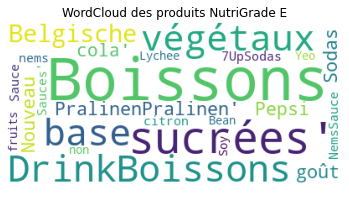

In [53]:
text = score_e['product_name'].values + score_e['categories'].values
wordcloud = WordCloud(background_color='white', stopwords=exclure_mots).generate(str(text))
plt.imshow(wordcloud)
plt.title("WordCloud des produits NutriGrade E")
plt.axis("off")
plt.show();

Finalement, les produits de nutri-grade 'E' se trouvent principalement dans la colonne 'sugary snacks' dans nos histogrammes en haut de la page. Nous pouvons voire également les mots "Pepsi", "7Up", "Boissons" dans notre WordCloud, ce qui permet de conclure aussi que les sodas sucrées sont categorisées sous un nutri-grade de E.

In [54]:
fig = px.histogram(score_e, x="pnns_groups_2", 
        title = 'Répartition des aliments de nutri-grade E')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
        xaxis_title = "Catégorie PNNS2",
        yaxis_title = "Quantité"
)
fig.show()

Avec cette histogramme, nous confirmons que la présence du sucre en grande quantité corréspond à un nutri-grade de E.

***

Pour s'informer davantage : https://fr.openfoodfacts.org/  
Katrin-Misel Ponomarjova, P3, 14/07/2022  
OpenClassrooms Formation Data Scientist Parcours Ingénieur IA